In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
file_path = 'dataframe.csv'
data = pd.read_csv(file_path)

data.head()

,x1,"""y1""","""x2""","""y2""","""x3""","""y3""","""x4""","""y4"""
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


Czyszczenie danych

In [3]:
data.columns = [col.strip().replace('"', '') for col in data.columns]
data.head()

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


Tworzenie słownika i par danych

In [4]:
results = {}

pairs = [('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3'), ('x4', 'y4')]

In [5]:
data.columns.tolist()

['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']

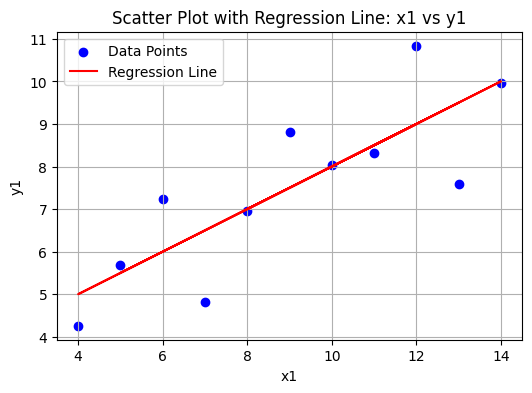

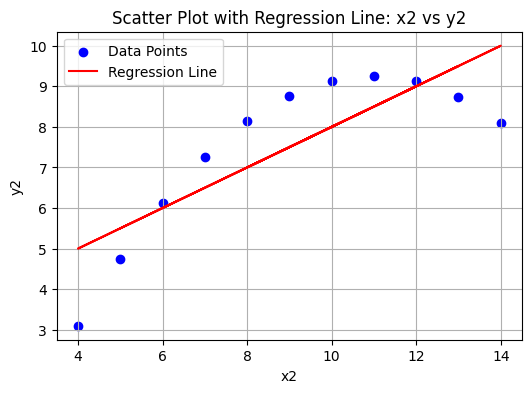

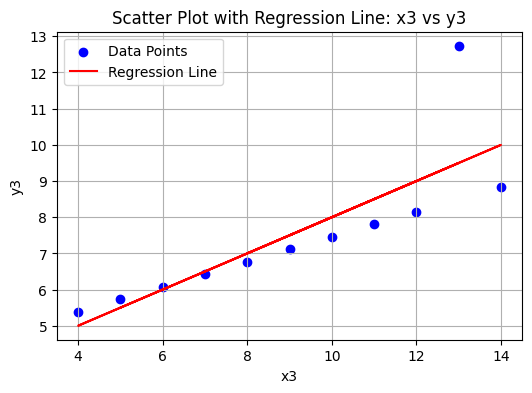

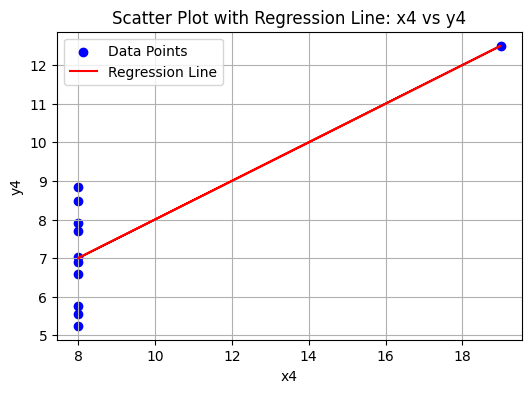

{('x1', 'y1'): {'mean_x': np.float64(9.0),
  'mean_y': np.float64(7.500909090909093),
  'var_x': np.float64(11.0),
  'var_y': np.float64(4.127269090909091),
  'correlation': np.float64(0.81642051634484),
  'slope': np.float64(0.5000909090909093),
  'intercept': np.float64(3.0000909090909085),
  'r_squared': np.float64(0.666542459508775)},
 ('x2', 'y2'): {'mean_x': np.float64(9.0),
  'mean_y': np.float64(7.50090909090909),
  'var_x': np.float64(11.0),
  'var_y': np.float64(4.127629090909091),
  'correlation': np.float64(0.8162365060002428),
  'slope': np.float64(0.5),
  'intercept': np.float64(3.0009090909090905),
  'r_squared': np.float64(0.6662420337274844)},
 ('x3', 'y3'): {'mean_x': np.float64(9.0),
  'mean_y': np.float64(7.5),
  'var_x': np.float64(11.0),
  'var_y': np.float64(4.12262),
  'correlation': np.float64(0.8162867394895984),
  'slope': np.float64(0.4997272727272729),
  'intercept': np.float64(3.002454545454545),
  'r_squared': np.float64(0.6663240410665592)},
 ('x4', 'y4'

In [6]:

for x_col, y_col in pairs:
    x = data[x_col]
    y = data[y_col]
    
    # Obliczanie
    mean_x, mean_y = x.mean(), y.mean()
    var_x, var_y = x.var(ddof=1), y.var(ddof=1)
    corr = np.corrcoef(x, y)[0, 1]
    
    # Analiza regresji
    x_with_const = sm.add_constant(x)  # Add constant for intercept
    model = sm.OLS(y, x_with_const).fit()
    slope, intercept = model.params[x_col], model.params['const']
    r_squared = model.rsquared
    
    # Przechowywanie wyników
    results[(x_col, y_col)] = {
        'mean_x': mean_x, 'mean_y': mean_y,
        'var_x': var_x, 'var_y': var_y,
        'correlation': corr,
        'slope': slope, 'intercept': intercept,
        'r_squared': r_squared
    }
    
    # Tworzenie wykresów
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, label='Data Points', color='blue')
    plt.plot(x, slope * x + intercept, color='red', label='Regression Line')
    plt.title(f"Scatter Plot with Regression Line: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

results